**This is very interesting data which is highly imbalanced and task is to minimize the cost when there is lot of difference in it. This notebook contain Exploratory data analysis , data cleaning , data visualization ,Principal component Analysis and fitting of different model which involves :**
1. Logistic regression
2. Support vector machine
3. KNN Classification
4. Random forest

**where ,Logistic regression is fitted for different training data set corresponding to different PCA (PRINCIPAL COMPONENT ANALYSIS) having different level of variance.
Main motive of this notebook is minimize the misclassification to reduce the total cost of maintenance.**

**Best result we obtained is with support vector machine i.e, Total cost = 13520$**

# **> EXPLORATORY DATA ANALYSIS AND DATA CLEANING**

In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/image-req/Capture.JPG
/kaggle/input/aps-failure-at-scania-trucks-data-set/aps_failure_training_set_processed_8bit.csv
/kaggle/input/aps-failure-at-scania-trucks-data-set/aps_failure_test_set.csv
/kaggle/input/aps-failure-at-scania-trucks-data-set/aps_failure_training_set.csv
/kaggle/input/aps-failure-at-scania-trucks-data-set/aps_failure_test_set_processed_8bit.csv
/kaggle/input/aps-failure-at-scania-trucks-data-set/aps_failure_description.txt


# **Let's Import all required libraries :**

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import lightgbm as lgbm

# preprocessing
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import recall_score,roc_auc_score,accuracy_score,roc_curve
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

**Now import data**

In [69]:
#Data Ingestion 
data_train=pd.read_csv('../input/aps-failure-at-scania-trucks-data-set/aps_failure_training_set.csv',error_bad_lines=False) 
data_test=pd.read_csv('../input/aps-failure-at-scania-trucks-data-set/aps_failure_test_set.csv',error_bad_lines=False)

In [70]:
data_train.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [71]:
data_test.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


# Print number of positive classes and number of negative classes in the training data-set

In [72]:
print("Number of positive classes = ", sum(data_train['class'] == 'pos'))
print("Number of negative classes = ", sum(data_train['class'] == 'neg'))

Number of positive classes =  1000
Number of negative classes =  59000


# Replace class labels with integer values (neg = 0, pos = 1) in training and test data-set, also map the na values to NULL

In [73]:
data_train = data_train.rename(columns = {'class' : 'Flag'})
data_train['Flag'] = data_train.Flag.map({'neg':0, 'pos':1})
data_train = data_train.replace(['na'],np.nan)
data_train.head()

,Flag,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,NaN,0,NaN,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,NaN,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,NaN,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [74]:
data_test = data_test.rename(columns = {'class' : 'Flag'})
data_test['Flag'] = data_test.Flag.map({'neg':0, 'pos':1})
data_test = data_test.replace(['na'],np.nan)
data_test.head()

,Flag,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,0,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,0,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,0,59816,NaN,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,0,1814,NaN,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0


# Exploratory Data Analysis :
# Compute the percentage of missing data for each attribute in the training data set

In [75]:
missing_percent_threshold = 0.50
total_num_data = len(data_train.index)
missing_data_count = pd.DataFrame(data_train.isnull().sum().sort_values(ascending=False), columns=['Number'])
missing_data_percent = pd.DataFrame(data_train.isnull().sum().sort_values(ascending=False)/total_num_data, columns=['Percent'])
missing_data = pd.concat([missing_data_count, missing_data_percent], axis=1)
missing_data

,Number,Percent
br_000,49264,0.821067
bq_000,48722,0.812033
bp_000,47740,0.795667
bo_000,46333,0.772217
cr_000,46329,0.772150
...,...,...
cj_000,338,0.005633
ck_000,338,0.005633
bt_000,167,0.002783
aa_000,0,0.000000


# Visualizing missing data in each column


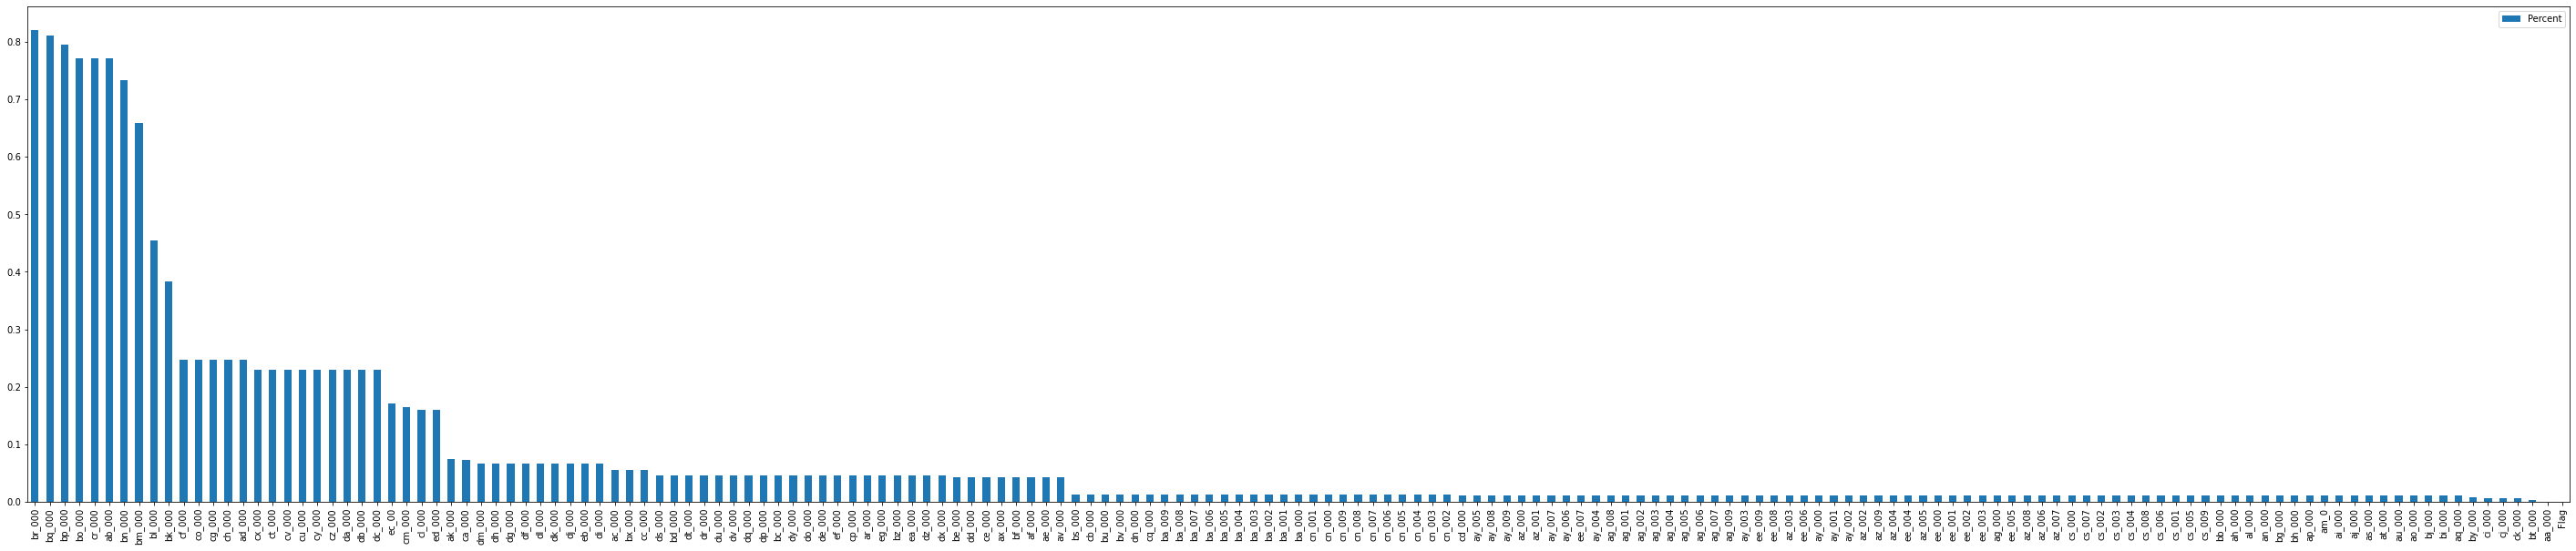

In [76]:
missing_data_percent.plot.bar(figsize=(50,10))
plt.show()

# Extracting missing data column more than 50%


In [77]:
missing_column_headers = missing_data[missing_data['Percent'] > missing_percent_threshold].index
print(missing_column_headers)  #are the missing data header with more than 50%

Index(['br_000', 'bq_000', 'bp_000', 'bo_000', 'cr_000', 'ab_000', 'bn_000',
       'bm_000'],
      dtype='object')


# Drop the features with high amount of missing data in both train and test data-set

In [78]:
data_train = data_train.drop(columns=missing_column_headers)
print("Training data-set shape after dropping features is ", data_train.shape)
data_test = data_test.drop(columns=missing_column_headers)
print("Test data-set shape after dropping features is ", data_test.shape)
print(data_train.describe())

Training data-set shape after dropping features is  (60000, 163)
Test data-set shape after dropping features is  (16000, 163)
               Flag        aa_000
count  60000.000000  6.000000e+04
mean       0.016667  5.933650e+04
std        0.128020  1.454301e+05
min        0.000000  0.000000e+00
25%        0.000000  8.340000e+02
50%        0.000000  3.077600e+04
75%        0.000000  4.866800e+04
max        1.000000  2.746564e+06


# Extract features and labels from the training and test data-set

In [79]:
y_train = data_train.loc[:, 'Flag']
x_train = data_train.drop('Flag', axis=1)
y_test = data_test.loc[:, 'Flag']
x_test = data_test.drop('Flag', axis=1)

# Fill missing data in training and test data-set
# Imputing the NA values in our data with the median value to get the central tendency or behaviour of trucks.

In [80]:
impute_median = SimpleImputer(strategy='median')
impute_median.fit(x_train.values)
x_train = impute_median.transform(x_train.values)
x_test = impute_median.transform(x_test.values)

# Standardize the training and test data-set

In [81]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)

# Visualize the scaled data to ensure that the data look similar after scaling 

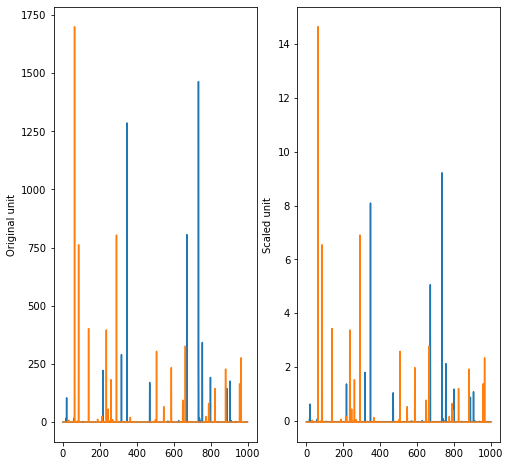

In [82]:
x_train_scaled_head=x_train_scaled[0:1000,3]
x_test_scaled_head=x_test_scaled[0:1000,3]
x_train_head=x_train[0:1000,3]
x_test_head=x_test[0:1000,3]

fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1,2,1)
plt.plot(x_train_head,label='train')
plt.plot(x_test_head,label='test')
plt.ylabel('Original unit')
fig.add_subplot(1,2,2)
plt.plot(x_train_scaled_head,label='scaled_train')
plt.plot(x_test_scaled_head,label='scaled_test')
plt.ylabel('Scaled unit')
plt.show()

# Visualizing imbalance in the data set


Text(0, 0.5, 'Frequency')

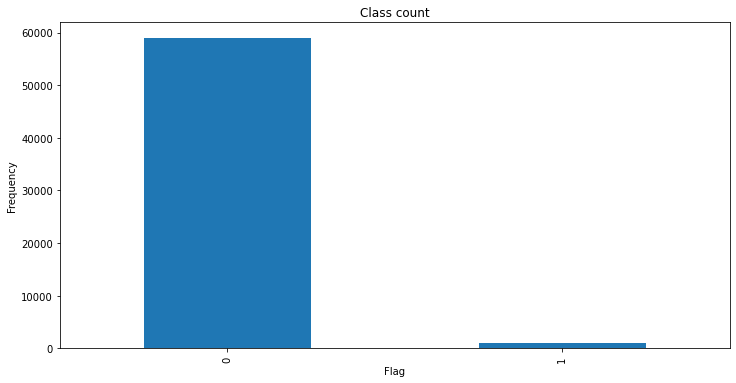

In [83]:
Count = pd.value_counts(y_train, sort = True).sort_index()
Count.plot(kind = 'bar')
plt.title("Class count")
plt.xlabel("Flag")
plt.ylabel("Frequency")

*** From here we can see it is highly imbalanced data set**

## *This is highly imbalanced data set. We will have to do some sampling technique here before modelling.

## *SMOTE (Synthetic Minority Oversampling Technique) for Handling Imbalanced Datasets

In [84]:
sm = SMOTE()
x_train_new, y_train_new = sm.fit_sample(x_train, y_train)
x_train_scaled_new, y_train_scaled_new = sm.fit_sample(x_train_scaled, y_train)

**## Principal Component Analysis**

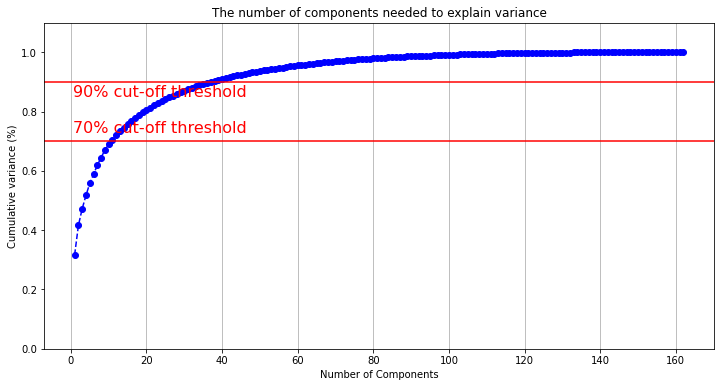

In [85]:
pca = PCA().fit(x_train_scaled_new)
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, 163, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.70, color='r', linestyle='-')
plt.text(0.5, 0.73, '70% cut-off threshold', color = 'red', fontsize=16)
plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

# Principal Component Analysis


In [86]:
n_comp=[0.70,0.75,0.80,0.90]

# TEST AND TRAIN VALUES FOR 70% VARIANCE

Number of features after PCA =  11


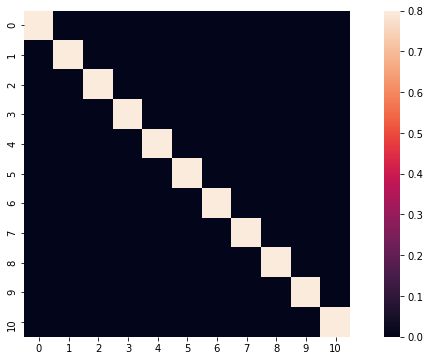

In [87]:
pca = PCA(n_components=n_comp[0])
pca.fit(x_train_scaled_new)
x_train_new_0 = pca.transform(x_train_scaled_new)
x_test_0 = pca.transform(x_test_scaled)
print("Number of features after PCA = ", x_test_0.shape[1])
corrmat_pca = pd.DataFrame(x_train_new_0).corr()
sn.heatmap(corrmat_pca, vmax=.8, square=True);
plt.show()
x_train_final_70 = x_train_new_0
y_train_final_70 = y_train_scaled_new
x_test_final_70= x_test_0
y_test_final_70 = y_test

# TEST AND TRAIN VALUES FOR 75% VARIANCE

Number of features after PCA =  15


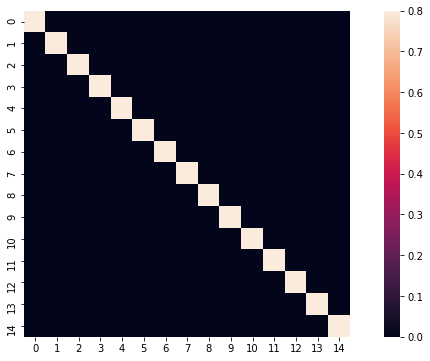

In [88]:
pca = PCA(n_components=n_comp[1])
pca.fit(x_train_scaled_new)
x_train_new_1 = pca.transform(x_train_scaled_new)
x_test_1 = pca.transform(x_test_scaled)
print("Number of features after PCA = ", x_test_1.shape[1])
corrmat_pca = pd.DataFrame(x_train_new_1).corr()
sn.heatmap(corrmat_pca, vmax=.8, square=True);
plt.show()
x_train_final_75 = x_train_new_1
y_train_final_75 = y_train_scaled_new
x_test_final_75 = x_test_1
y_test_final_75 = y_test

# TEST AND TRAIN VALUES FOR 80% VARIANCE

Number of features after PCA =  20


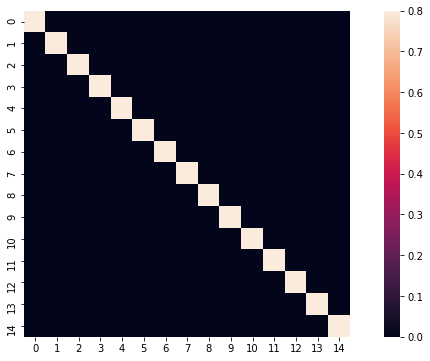

In [89]:
pca = PCA(n_components=n_comp[2])
pca.fit(x_train_scaled_new)
x_train_new_2 = pca.transform(x_train_scaled_new)
x_test_2 = pca.transform(x_test_scaled)
print("Number of features after PCA = ", x_test_2.shape[1])
corrmat_pca = pd.DataFrame(x_train_new_1).corr()
sn.heatmap(corrmat_pca, vmax=.8, square=True);
plt.show()
x_train_final_80 = x_train_new_2
y_train_final_80 = y_train_scaled_new
x_test_final_80 = x_test_2
y_test_final_80 = y_test

# TEST AND TRAIN VALUES FOR 90% VARIANCE


Number of features after PCA =  37


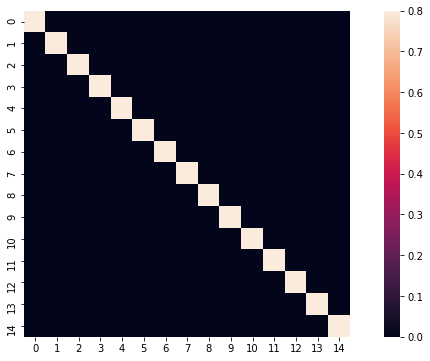

In [90]:
pca = PCA(n_components=n_comp[3])
pca.fit(x_train_scaled_new)
x_train_new_3 = pca.transform(x_train_scaled_new)
x_test_3 = pca.transform(x_test_scaled)
print("Number of features after PCA = ", x_test_3.shape[1])
corrmat_pca = pd.DataFrame(x_train_new_1).corr()
sn.heatmap(corrmat_pca, vmax=.8, square=True);
plt.show()
x_train_final_90 = x_train_new_3
y_train_final_90 = y_train_scaled_new
x_test_final_90 = x_test_3
y_test_final_90 = y_test

## **CONFUSION MATRIX FUNCTION

Let's define a function for confusion matrix

In [91]:
def confusionmatrix(y_test,y_predict,x='name of model'):
    cm=metrics.confusion_matrix(y_test,y_predict)
    # recall=print(round(recall_score(y_test, y_predict, average='macro')*100,2))
    plt.figure(figsize=(10,7))
    sn.heatmap(cm,annot=True,cbar=False, fmt='g')
    cm1 = pd.DataFrame(cm.reshape((1,4)), columns=['TN', 'FP', 'FN', 'TP'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(x)
    TC= 10*cm1.FP + 500*cm1.FN   
    return [ plt.show(),print(cm1),print(TC)]

# Now comes the part of application of model :

## Logistic Regression

## Here we need to create a model which reduces the misclassification based on Cost 1 (10) and Cost 2 (500) and since Cost 2s multiplication factor is higher than Cost 1s i am going with recall as the performance metric here which basically gives the measure of how many positives cases did we catch(TP/TP+FN). 
## Higher recall means lesser FNs which in turn reduces our total cost.


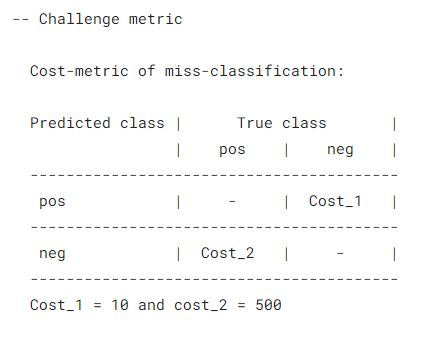

In [92]:
from IPython.display import Image
Image("../input/image-req/Capture.JPG")

# Apply logistic regression on data having 70% feature after PCA

In [93]:
c_parameter_range = [0.0001,0.001,0.01,0.1,1,10,100]

logistic_acc_table_70 = pd.DataFrame(columns = ['C_parameter','Recall'])
logistic_acc_table_70['C_parameter'] = c_parameter_range

    
p=0

for c_param in c_parameter_range:
    lr = LogisticRegression(C = c_param)
    lr.fit(x_train_final_70, y_train_final_70.values.ravel())
    y_pred = lr.predict(x_test_final_70)
    logistic_acc_table_70.iloc[p,1] = recall_score(y_test_final_70,y_pred)
    p+=1
    


## let's choose the c value corrsponding to maximum recall

In [94]:
x=logistic_acc_table_70.isin([max(logistic_acc_table_70.Recall)])
seriesObj = x.any()
columnNames = list(seriesObj[seriesObj == True].index)
for col in columnNames:
        rows = list(x[col][x[col] == True].index)
index = np.array(rows)
max_c_param=logistic_acc_table_70.C_parameter[index[0]]
print(max(logistic_acc_table_70.Recall))  


0.9146666666666666


**Let's fit the model**

In [95]:
logreg = LogisticRegression(C=max_c_param)
logreg.fit(x_train_final_70, y_train_final_70)

LogisticRegression(C=0.001)

Visualize the result

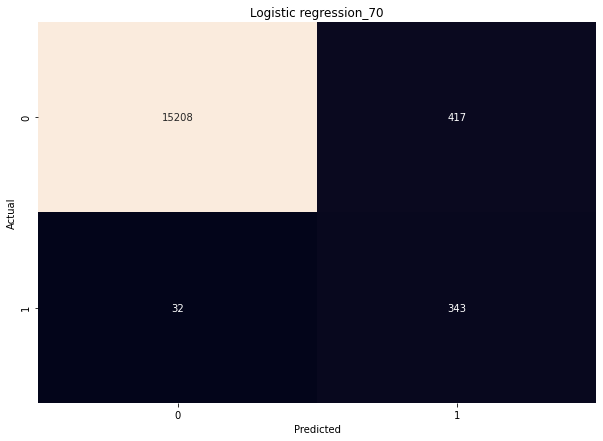

      TN   FP  FN   TP
0  15208  417  32  343
0    20170
dtype: int64


[None, None, None]

In [96]:
# visualization using confusion matrix
confusionmatrix(y_test_final_70,logreg.predict(x_test_final_70),x='Logistic regression_70')

Total cost comes out to be 21040$

# Apply logistic regression on data having 75% feature after PCA

In [97]:
logistic_acc_table_75 = pd.DataFrame(columns = ['C_parameter','Recall'])
logistic_acc_table_75['C_parameter'] = c_parameter_range


    
j=0

for c_param in c_parameter_range:
    lr = LogisticRegression(C = c_param)
    lr.fit(x_train_final_75, y_train_final_75.values.ravel())
    y_pred = lr.predict(x_test_final_75)
    logistic_acc_table_75.iloc[j,1] = recall_score(y_test_final_75,y_pred)
    j+=1



## let's choose the c value corrsponding to maximum recall 

In [98]:
x=logistic_acc_table_75.isin([max(logistic_acc_table_75.Recall)])
seriesObj = x.any()
columnNames = list(seriesObj[seriesObj == True].index)
for col in columnNames:
        rows = list(x[col][x[col] == True].index)
index = np.array(rows)
max_c_param=logistic_acc_table_75.C_parameter[index[0]]


print(max(logistic_acc_table_75.Recall)) 

0.9093333333333333


Let's fit the model

In [99]:
logreg = LogisticRegression(C=max_c_param)
logreg.fit(x_train_final_75, y_train_final_75)

LogisticRegression(C=0.0001)

Visualize the result

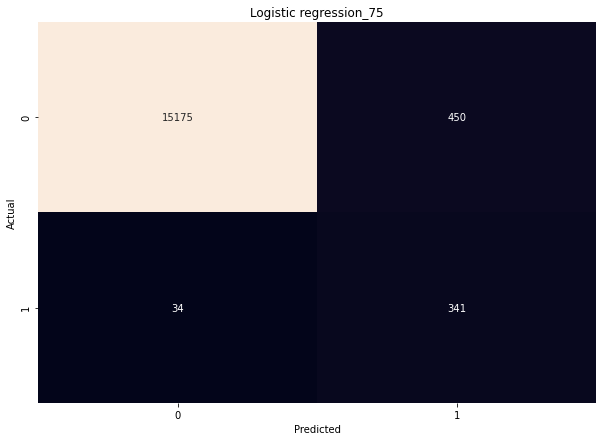

      TN   FP  FN   TP
0  15175  450  34  341
0    21500
dtype: int64


[None, None, None]

In [100]:
# visualization using confusion matrix
confusionmatrix(y_test_final_75,logreg.predict(x_test_final_75),x='Logistic regression_75')

Total cost comes out to be 21940$

# Apply logistic regression on data having 80% feature after PCA

In [101]:
logistic_acc_table_80 = pd.DataFrame(columns = ['C_parameter','Recall'])
logistic_acc_table_80['C_parameter'] = c_parameter_range

    
k=0

for c_param in c_parameter_range:
    lr = LogisticRegression(C = c_param)
    lr.fit(x_train_final_80, y_train_final_80.values.ravel())
    y_pred = lr.predict(x_test_final_80)
    logistic_acc_table_80.iloc[k,1] = recall_score(y_test_final_80,y_pred)
    k+=1

## let's choose the c value corrsponding to maximum recall

In [102]:
x=logistic_acc_table_80.isin([max(logistic_acc_table_80.Recall)])
seriesObj = x.any()
columnNames = list(seriesObj[seriesObj == True].index)
for col in columnNames:
        rows = list(x[col][x[col] == True].index)
index = np.array(rows)
max_c_param=logistic_acc_table_80.C_parameter[index[0]]



print(max(logistic_acc_table_80.Recall)) 

0.904


Let's fit the model

In [103]:
logreg = LogisticRegression(C=max_c_param)
logreg.fit(x_train_final_80, y_train_final_80)

LogisticRegression(C=0.0001)

Visualize

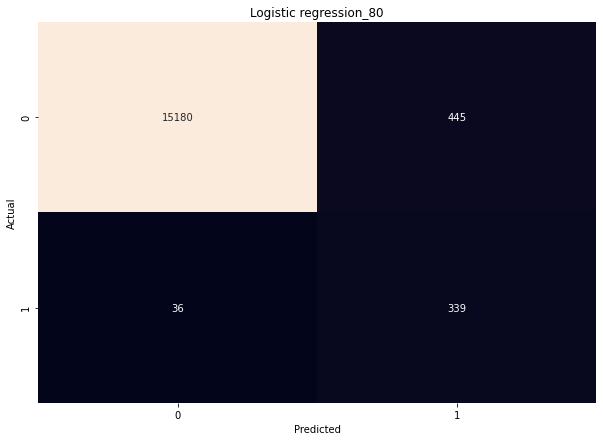

      TN   FP  FN   TP
0  15180  445  36  339
0    22450
dtype: int64


[None, None, None]

In [104]:
# visualization using confusion matrix
confusionmatrix(y_test_final_80,logreg.predict(x_test_final_80),x='Logistic regression_80')

Total cost comes out to be 21930$

# Apply logistic regression on data having 90% feature after PCA

In [105]:
logistic_acc_table_90 = pd.DataFrame(columns = ['C_parameter','Recall'])
logistic_acc_table_90['C_parameter'] = c_parameter_range

    
m=0

for c_param in c_parameter_range:
    lr = LogisticRegression(C = c_param)
    lr.fit(x_train_final_90, y_train_final_90.values.ravel())
    y_pred = lr.predict(x_test_final_90)
    logistic_acc_table_90.iloc[m,1] = recall_score(y_test_final_90,y_pred)
    m+=1

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


let's choose the c value corrsponding to maximum recall

In [106]:
x=logistic_acc_table_90.isin([max(logistic_acc_table_90.Recall)])
seriesObj = x.any()
columnNames = list(seriesObj[seriesObj == True].index)
for col in columnNames:
        rows = list(x[col][x[col] == True].index)
index = np.array(rows)
max_c_param=logistic_acc_table_90.C_parameter[index[0]]

print(max(logistic_acc_table_90.Recall))  

0.904


Let's fit the model

In [107]:
logreg = LogisticRegression(C=max_c_param)
logreg.fit(x_train_final_90, y_train_final_90)

LogisticRegression(C=0.0001)

Visualize

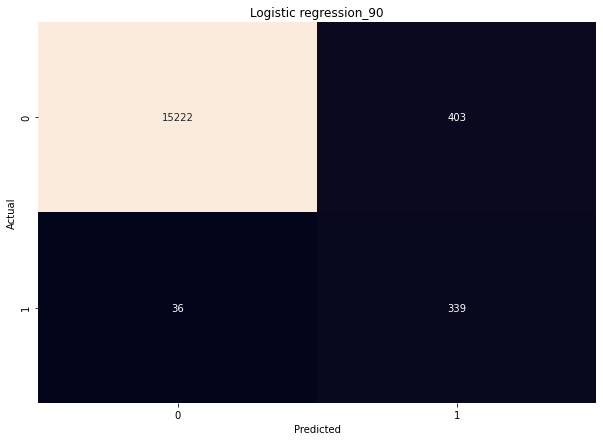

      TN   FP  FN   TP
0  15222  403  36  339
0    22030
dtype: int64


[None, None, None]

In [108]:
# visualization using confusion matrix
confusionmatrix(y_test_final_90,logreg.predict(x_test_final_90),x='Logistic regression_90')

Total cost comes out to be 22530$

*** From above it's evident that lowest cost comes out at PCA with 70 % of variance**


# **Support vector machine**

**Let's continue with data of 75 % PCA Variance**

# 50 different combinations of C and Gamma values were used to evaluate the C and gamma parameters were chosen using the logarithmic scale between total cost came to be minimum when C=0.03593813663804628 and gamma = 0.1778279410038923 with recall score of 0.9786666666666667

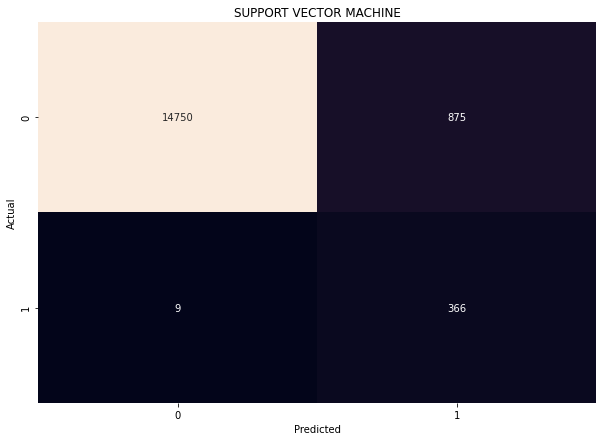

      TN   FP  FN   TP
0  14750  875   9  366
0    13250
dtype: int64


[None, None, None]

In [109]:
clf = SVC(C = 0.03593813663804628,kernel = 'rbf',gamma = 0.1778279410038923)
clf.fit(x_train_final_75, y_train_final_75)
y_pred = clf.predict(x_test_final_75)
Recall = recall_score(y_test_final_75,y_pred)
confusionmatrix(y_test_final_75,clf.predict(x_test_final_75),x='SUPPORT VECTOR MACHINE')

Total cost comes out to be 13250$

# **KNN CLASSIFIER**

Let's first define a new function of confusion matrix for this :

In [110]:
def confusionmatrix_knn(y_test,y_predict):
    cm=metrics.confusion_matrix(y_test,y_predict)
    cm1 = pd.DataFrame(cm.reshape((1,4)), columns=['TN', 'FP', 'FN', 'TP'])
    TC= 10*cm1.FP + 500*cm1.FN   
    return [TC]

Let's fit the KNN model for different n_neighbors

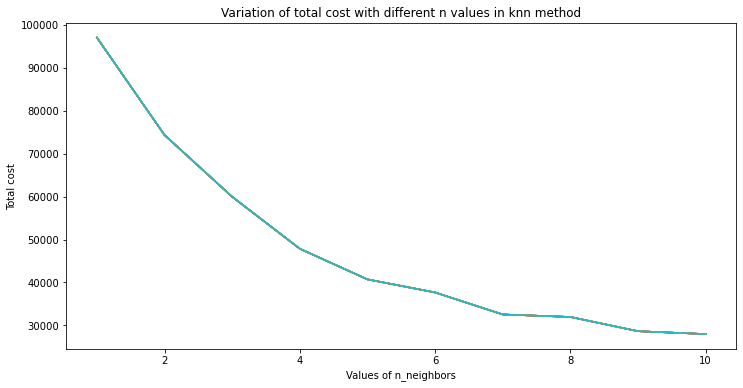

In [114]:
total_cost_knn= np.empty((10, 1))

for i in range(0,10):
      knn =KNeighborsClassifier(n_neighbors=i+1)
      knn.fit(x_train_final_75, y_train_final_75)
      total_cost_knn[i,:]=confusionmatrix_knn(y_test_final_75,knn.predict(x_test_final_75))
      
      
plt.figure()        
l = range(1,11)
for j in range(len(l)):     
    plt.plot( l, total_cost_knn)
    plt.xlabel('Values of n_neighbors')
    plt.ylabel('Total cost')
    plt.title('Variation of total cost with different n values in knn method')

Find the value of n_neighbor for representing minimum cost

In [112]:
minElement = np.amin(total_cost_knn)    
result = np.where(total_cost_knn == np.amin(total_cost_knn))
min_cost_index=result[0]+1

Visualize the confusion matrix for corresponding n_neighbors value

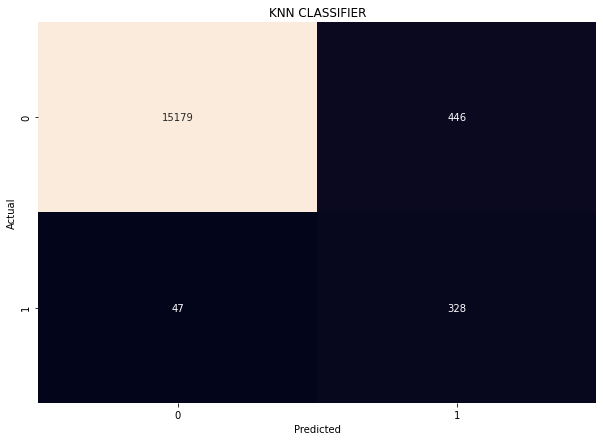

      TN   FP  FN   TP
0  15179  446  47  328
0    27960
dtype: int64


[None, None, None]

In [115]:
#visualization using confusion matrix for maximum accuracy as it comes at n_neighbors=9
knn =KNeighborsClassifier(n_neighbors=min_cost_index[0])
knn.fit(x_train_final_75, y_train_final_75)
confusionmatrix(y_test_final_75,knn.predict(x_test_final_75),x='KNN CLASSIFIER')

Total cost comes out to be 27960$

# **Random Forest**

Let's first define a new function of confusion matrix for this :

In [116]:
def confusionmatrix_RANDOM(y_test,y_predict):
    cm=metrics.confusion_matrix(y_test,y_predict)
    cm1 = pd.DataFrame(cm.reshape((1,4)), columns=['TN', 'FP', 'FN', 'TP'])
    TC= 10*cm1.FP + 500*cm1.FN   
    return [TC,print(cm1),print(TC)]

Let's fit the RANDOM FOREST model for different n_estimators

      TN   FP  FN   TP
0  15398  227  51  324
0    27770
dtype: int64
      TN   FP  FN   TP
0  15391  234  50  325
0    27340
dtype: int64
      TN   FP  FN   TP
0  15394  231  50  325
0    27310
dtype: int64
      TN   FP  FN   TP
0  15390  235  50  325
0    27350
dtype: int64
      TN   FP  FN   TP
0  15392  233  52  323
0    28330
dtype: int64
      TN   FP  FN   TP
0  15389  236  51  324
0    27860
dtype: int64
      TN   FP  FN   TP
0  15392  233  51  324
0    27830
dtype: int64
      TN   FP  FN   TP
0  15388  237  51  324
0    27870
dtype: int64
      TN   FP  FN   TP
0  15393  232  53  322
0    28820
dtype: int64
      TN   FP  FN   TP
0  15388  237  50  325
0    27370
dtype: int64
      TN   FP  FN   TP
0  15392  233  54  321
0    29330
dtype: int64
      TN   FP  FN   TP
0  15387  238  52  323
0    28380
dtype: int64
      TN   FP  FN   TP
0  15388  237  53  322
0    28870
dtype: int64
      TN   FP  FN   TP
0  15385  240  52  323
0    28400
dtype: int64
      TN   FP  FN   

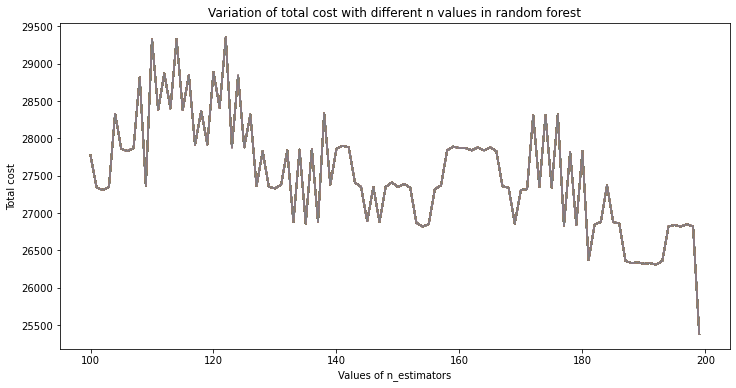

In [118]:
total_cost_RANDOM= []



for m in range(100,200):
    random_forest=RandomForestClassifier(n_estimators= m,random_state=1)
    random_forest.fit(x_train_final_75, y_train_final_75)
    total_cost=confusionmatrix_RANDOM(y_test_final_75,random_forest.predict(x_test_final_75))
    total_cost_RANDOM.append(total_cost)


plt.figure()        
l = range(100,200)
for j in range(len(l)):     
    plt.plot( l, total_cost_RANDOM)
    plt.xlabel('Values of n_estimators')
    plt.ylabel('Total cost')
    plt.title('Variation of total cost with different n values in random forest')

Find the value of n_estimators for representing minimum cost

In [119]:
def Extract(lst): 
    return [item[0] for item in lst]

total_cost_min=Extract(total_cost_RANDOM)

new_list = []
for item in total_cost_min:
    new_list.append(float(item))
total_cost_RANDOM=np.asarray(new_list)
total_cost_RANDOM = pd.DataFrame(total_cost_RANDOM)
total_cost_RANDOM.insert(0, "index", range(100,200), True) 

x=total_cost_RANDOM.isin([min(total_cost_RANDOM[0])])
seriesObj = x.any()
columnNames = list(seriesObj[seriesObj == True].index)
for col in columnNames:
        rows = list(x[col][x[col] == True].index)
index = np.array(rows)
index_value=total_cost_RANDOM.index[index[0]]
index_value_random=int(total_cost_RANDOM.loc[index_value]['index'])

Visualize confusion matrix and cost

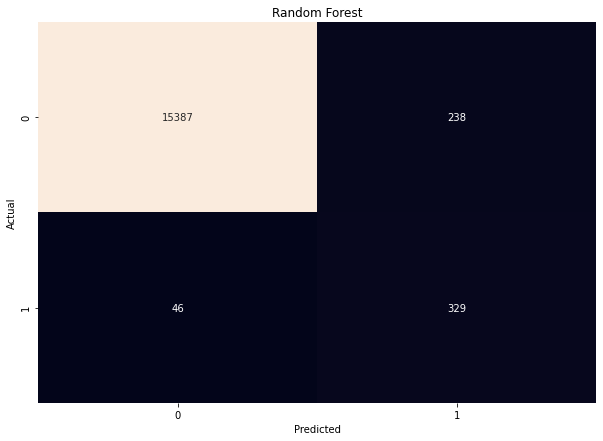

      TN   FP  FN   TP
0  15387  238  46  329
0    25380
dtype: int64


[None, None, None]

In [120]:
#visualization using confusion matrix for maximum accuracy as it comes at n=80
random_forest=RandomForestClassifier(n_estimators= index_value_random,random_state=1)
random_forest.fit(x_train_final_75, y_train_final_75)
confusionmatrix(y_test_final_75,random_forest.predict(x_test_final_75),x='Random Forest')


Total cost comes out to be 25380$